# Coffee Sales Visualization Project
<img src='https://storage.googleapis.com/kaggle-datasets-images/5328600/8852356/51447233be78d623e2686af35aa08bc2/dataset-cover.jpeg?t=2024-07-03-19-34-12'>

# About Dataset

**Overview**

This dataset contains detailed records of coffee sales from a vending machine.

The vending machine is the work of a dataset author who is committed to providing an open dataset to the community.

It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products.

**Data Collection Period**

The dataset spans from March 2024 to Present time, capturing daily transaction data. And new information continues to be added.

**Tasks**

Time Series Exploratory Data Analysis

Next day/week/month sales

Specific customer purchases

In [ ]:
# import specific modules which are required
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt, warnings,os,zipfile
warnings.filterwarnings('ignore')


In [ ]:
def unzip_file(zip_file_path, extract_to_folder):
    # Ensure the extraction folder exists
    os.makedirs(extract_to_folder, exist_ok=True)

    # Open the zip file and extract all contents
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_folder)
        print(f"Extracted all files to {extract_to_folder}")

def load_data():
    # Define file paths
    csv_file_path = 'content/index.csv'
    zip_file_path = 'coffee-sales.zip'

    # Check if the CSV file exists
    if os.path.exists(csv_file_path):
        return pd.read_csv(csv_file_path)

    # Otherwise, handle zip file download and extraction
    if not os.path.exists(zip_file_path):
        !kaggle datasets download -d ihelon/coffee-sales
    unzip_file(zip_file_path, 'content/')

    return pd.read_csv(csv_file_path)

# Load data
coffee_df = load_data()
print(coffee_df)


Dataset URL: https://www.kaggle.com/datasets/ihelon/coffee-sales
License(s): CC0-1.0
  0% 0.00/16.7k [00:00<?, ?B/s]
100% 16.7k/16.7k [00:00<00:00, 17.6MB/s]
Extracted all files to content/
            date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
1459  2024-09-05  2024-09-05 20:30:14.964      card  ANON-0000-0000-0587   
1460  2024-09-05  2024-09-05 20:54:24.429      card  ANON-0000-0000-0588   
1461  2024-09-05  2024-09-05 20:55:31.429      card  ANON-0000-0000-0588   
1462  2024-09-05  2024-09-05 21:26:28.836      car

In [ ]:
coffee_df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1464 non-null   object 
 1   datetime     1464 non-null   object 
 2   cash_type    1464 non-null   object 
 3   card         1375 non-null   object 
 4   money        1464 non-null   float64
 5   coffee_name  1464 non-null   object 
dtypes: float64(1), object(5)
memory usage: 68.8+ KB


## Exploratory Data Analysis

- We clear the null values
- Data Extraction
- Unnessasary Columns removal
etc


In [ ]:
# In the above information we can see that the card column have some missing values
# Now we have to remove those columns
coffee_df.isna().sum() #Check for null values
coffee_df['card'].dropna(inplace=True) #Dropping Null values and appling to the same dataframe

In [ ]:
#as we already have the datetime column we are now dropping the date column
coffee_df.drop('date',axis=1,inplace=True) #Dropping date column and appling to the same dataframe
coffee_df.sample() # To make sure that the changes are applied

,datetime,cash_type,card,money,coffee_name
382,2024-04-28 12:30:09.749,card,ANON-0000-0000-0140,37.72,Cappuccino


In [ ]:
coffee_df['datetime']=pd.to_datetime(coffee_df['datetime']) # Convertion of object to date type
coffee_df['day']=coffee_df['datetime'].dt.day #Get date
coffee_df['month']=coffee_df['datetime'].dt.month #Get month
coffee_df['year']=coffee_df['datetime'].dt.year #Get year
coffee_df['hour']=coffee_df['datetime'].dt.hour #Get hour
coffee_df['minute']=coffee_df['datetime'].dt.minute #Get minutes
coffee_df['second']=coffee_df['datetime'].dt.second #Get seconds
coffee_df['quarter']=coffee_df['datetime'].dt.quarter #Get quater

#Get the weekday
coffee_df['weekday']=coffee_df['datetime'].dt.weekday.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
#Dropping of 'datetime' column as we extracted all the info and also 'cash_type' columns as all the values in the card column is 'card' only
coffee_df.drop(['datetime','cash_type'],axis=1,inplace=True)
coffee_df['card']=coffee_df['card'].str.extract(r'(\d+)$')
#Check wheather the changes are applied or not
coffee_df

,card,money,coffee_name,day,month,year,hour,minute,second,quarter,weekday
0,0001,38.70,Latte,1,3,2024,10,15,50,1,Friday
1,0002,38.70,Hot Chocolate,1,3,2024,12,19,22,1,Friday
2,0002,38.70,Hot Chocolate,1,3,2024,12,20,18,1,Friday
3,0003,28.90,Americano,1,3,2024,13,46,33,1,Friday
4,0004,38.70,Latte,1,3,2024,13,48,14,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...
1459,0587,32.82,Cappuccino,5,9,2024,20,30,14,3,Thursday
1460,0588,23.02,Americano,5,9,2024,20,54,24,3,Thursday
1461,0588,32.82,Cappuccino,5,9,2024,20,55,31,3,Thursday
1462,0040,27.92,Americano with Milk,5,9,2024,21,26,28,3,Thursday


## Time Series Exploratory Data Analysis

# Weekly Coffee Sales Trends
* Create a graph that depicts the sales trends based on the day of the week


---



In [ ]:
latedf=coffee_df.groupby(['coffee_name','quarter'])['money'].sum().reset_index()
pivoted_data = latedf.pivot(index='coffee_name', columns='quarter', values='money')
pivoted_data['Growth']=(pivoted_data[3] - pivoted_data[1]) / pivoted_data[1] * 100
pivoted_data

quarter,1,2,3,Growth
coffee_name,,,,
Americano,1044.8,2741.62,1871.00,79.077335
Americano with Milk,1154.0,5584.14,4460.36,286.512998
Cappuccino,780.5,5473.00,2490.90,219.141576
Cocoa,232.2,763.46,825.40,255.469423
Cortado,869.2,1553.60,1289.12,48.311091
Espresso,241.0,586.34,526.96,118.655602
Hot Chocolate,854.0,1563.46,557.94,-34.667447
Latte,1874.5,5277.12,4253.38,126.907442


In [ ]:
coffee_df.groupby('weekday')['money'].sum().reset_index()

,weekday,money
0,Friday,6306.20
1,Monday,6391.66
2,Saturday,6479.50
3,Sunday,6421.24
4,Thursday,7086.10
5,Tuesday,7627.62
6,Wednesday,6555.68


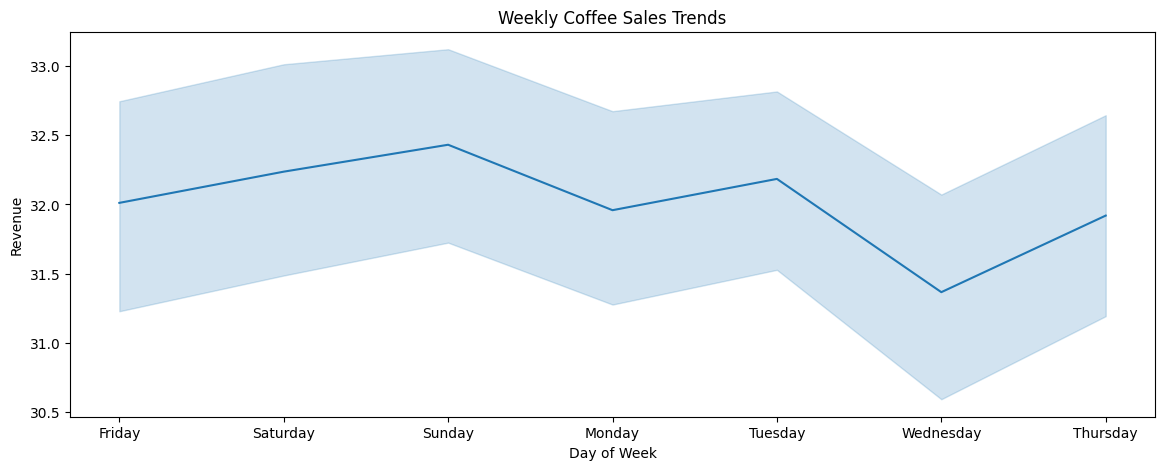

In [ ]:
plt.figure(figsize=(14,5))
sns.lineplot(data=coffee_df,y='money',x='weekday')
plt.ylabel('Revenue')
plt.xlabel('Day of Week')
plt.xticks(coffee_df['weekday'].unique())
plt.title('Weekly Coffee Sales Trends')
plt.show()

Conclusion:
from the above graph we can conclude that
- Least revenue is generated on 'Wednesday'
- Highest revenue is generated by 'Sunday'

# Sales Comparison Across Different Coffee Types
* Create a graph that depicts the sales trends based on the Different Coffee types
---

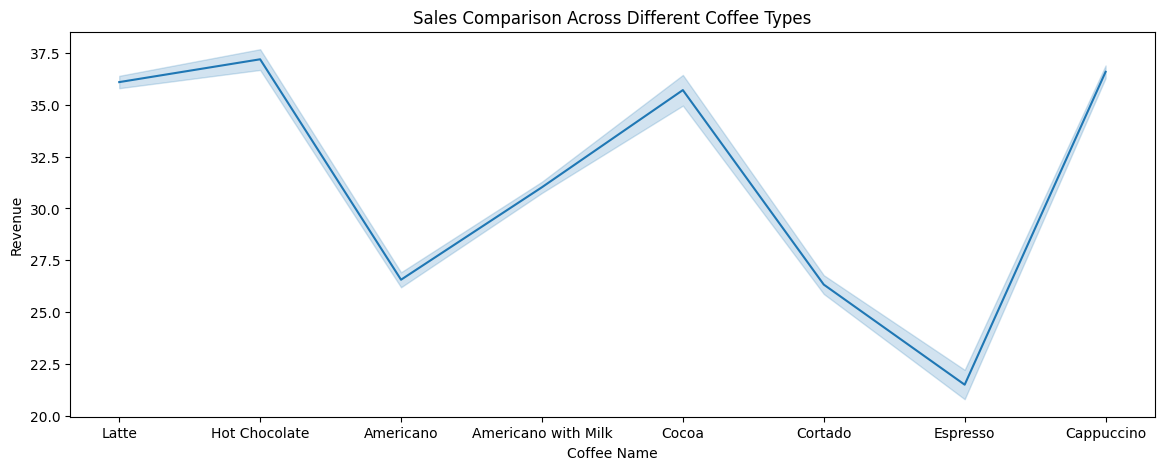

In [ ]:
plt.figure(figsize=(14,5))
sns.lineplot(data=coffee_df,y='money',x='coffee_name')
plt.ylabel('Revenue')
plt.xlabel('Coffee Name')
plt.xticks(coffee_df['coffee_name'].unique())
plt.title('Sales Comparison Across Different Coffee Types')
plt.show()

Conclusion:
from the above graph we can conclude that
- Least revenue is generated by 'Express'
- Highest revenue is generated by 'Hot Chocolate'

# Monthly Coffee Sales Trends
* Create a graph that depicts the sales trends based on the month
---

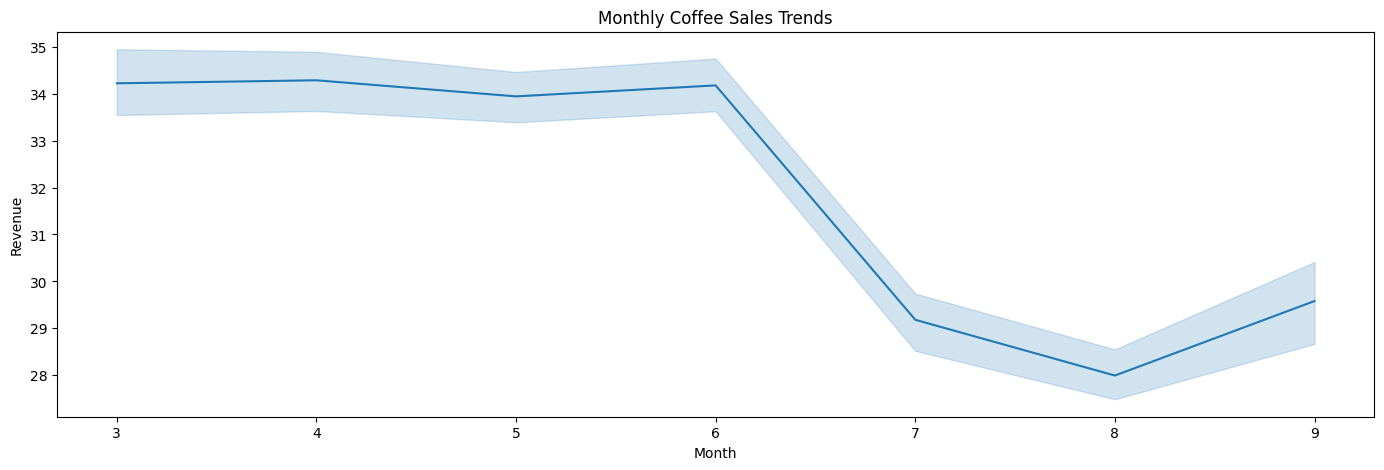

In [ ]:
plt.figure(figsize=(17,5))
sns.lineplot(data=coffee_df,y='money',x='month')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(coffee_df['month'].unique())
plt.title('Monthly Coffee Sales Trends')
plt.show()

Conclusion:
from the above graph we can conclude that
- Least revenue is generated in 'August'
- Highest revenue is generated in 'June'

# Peak Sales Hours for Coffee

* Create a graph that depicts the sales trends based on the hour
---

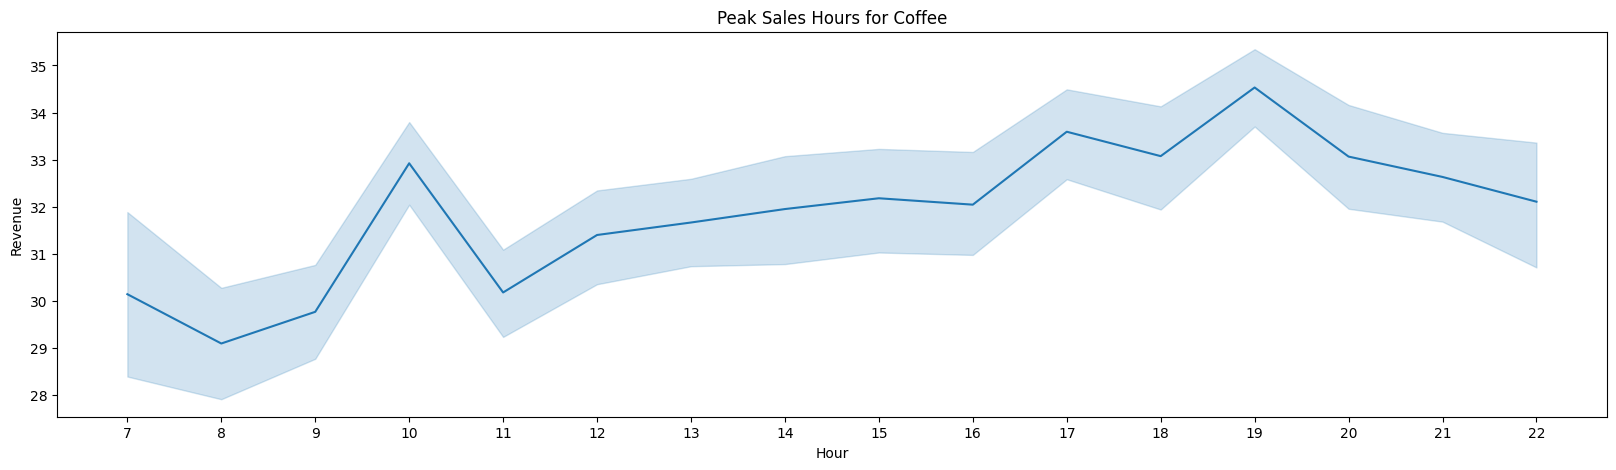

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=coffee_df,y='money',x='hour')
plt.ylabel('Revenue')
plt.xlabel('Hour')
plt.title('Peak Sales Hours for Coffee')
plt.xticks(coffee_df['hour'].unique())
plt.show()

Conclusion:
from the above graph we can conclude that
- Least revenue is generated at '19:00' or '7:00 PM'
- Highest revenue is generated at '8:00' or '8:00 AM'

# Next day/week/month sales

In [ ]:
#daily sales report
daily_sales=coffee_df.pivot_table(index='day',columns='coffee_name',values='money',aggfunc='sum').fillna(0)
daily_sales['total']=daily_sales.sum(axis=1)
daily_sales


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,total
day,,,,,,,,,
1,126.86,652.96,322.16,115.42,73.96,23.02,154.80,284.12,1753.30
2,245.40,504.74,185.98,32.82,51.92,0.00,0.00,367.04,1387.90
3,57.80,657.76,288.04,169.98,185.76,41.14,77.40,545.84,2023.72
4,50.94,398.24,278.24,0.00,112.66,24.00,75.44,401.52,1341.04
5,268.54,421.26,317.26,219.78,160.66,70.04,154.80,499.98,2112.32
6,198.48,288.74,337.52,32.82,107.76,0.00,32.82,424.22,1422.36
7,125.88,246.10,392.38,141.08,140.58,65.14,143.04,326.40,1580.60
8,190.54,252.98,295.88,0.00,125.88,43.12,0.00,219.46,1127.86
9,325.36,305.66,339.80,0.00,107.76,47.02,227.62,407.08,1760.30


In [ ]:
#daily sales report
daily_sales=coffee_df.pivot_table(index='month',columns='coffee_name',values='money',aggfunc='sum').fillna(0)
daily_sales['total']=daily_sales.sum(axis=1)

daily_sales


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,total
month,,,,,,,,,
3,1044.80,1154.00,780.50,232.20,869.20,241.00,854.00,1874.50,7050.20
4,1001.94,1407.74,1659.44,232.82,548.48,171.00,506.02,1193.12,6720.56
5,1348.80,1908.28,2078.44,340.76,474.64,185.14,529.36,2198.00,9063.42
6,390.88,2268.12,1735.12,189.88,530.48,230.20,528.08,1886.00,7758.76
7,858.12,1863.80,1079.64,300.28,322.28,273.28,361.02,1857.52,6915.94
8,851.74,2010.24,1115.88,361.02,920.80,253.68,196.92,1903.56,7613.84
9,161.14,586.32,295.38,164.10,46.04,0.00,0.00,492.30,1745.28


In [ ]:
#daily sales report
daily_sales=coffee_df.pivot_table(index='weekday',columns='coffee_name',values='money',aggfunc='sum').fillna(0)
daily_sales['total']=daily_sales.sum(axis=1)

daily_sales


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,total
weekday,,,,,,,,,
Friday,906.28,1322.00,864.60,296.20,528.02,217.46,542.28,1629.36,6306.20
Monday,1175.10,1465.96,1329.46,239.54,380.22,115.14,212.60,1473.64,6391.66
Saturday,517.94,1982.62,1293.38,328.32,527.52,155.74,273.82,1400.16,6479.50
Sunday,588.02,1437.08,1460.58,137.16,512.10,200.32,521.22,1564.76,6421.24
Thursday,861.70,1538.10,1406.04,32.82,522.14,253.70,514.66,1956.94,7086.10
Tuesday,775.60,2073.62,1174.66,536.70,634.92,77.38,604.82,1749.92,7627.62
Wednesday,832.78,1379.12,1215.68,250.32,607.00,334.56,306.00,1630.22,6555.68


# Specific customer purchases

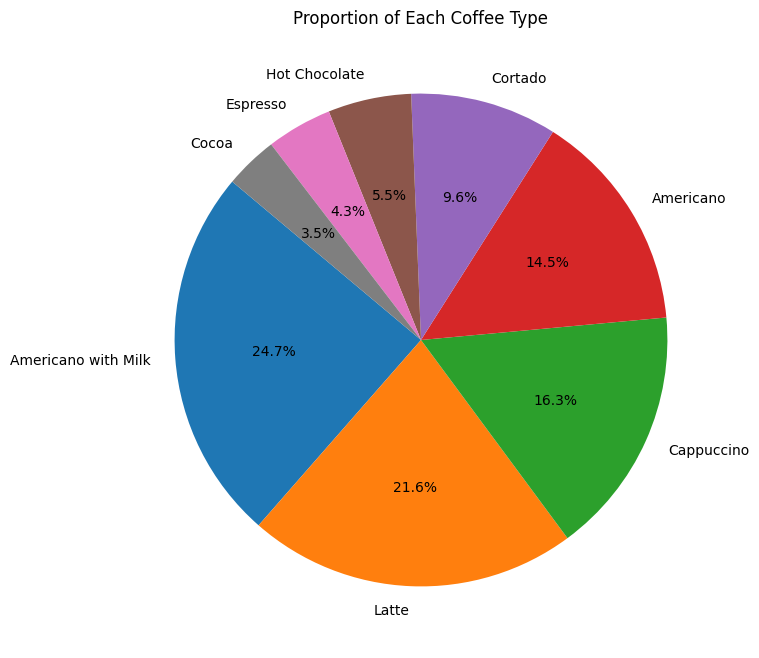

In [ ]:

# Pie Chart for coffee_name
plt.figure(figsize=(8, 8))
coffee_counts = coffee_df['coffee_name'].value_counts()
plt.pie(coffee_counts, labels=coffee_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Coffee Type')
plt.show()


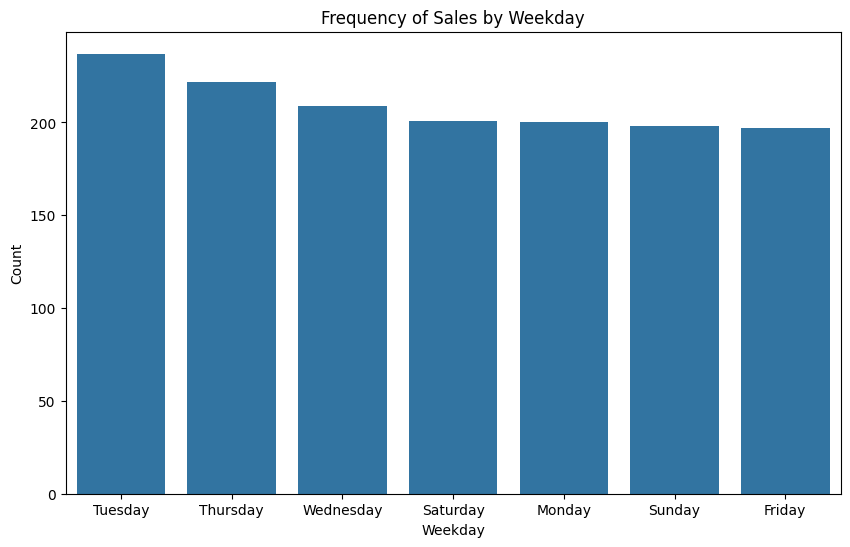

In [ ]:
# Bar Chart for weekday
plt.figure(figsize=(10, 6))
sns.countplot(data=coffee_df, x='weekday', order=coffee_df['weekday'].value_counts().index)
plt.title('Frequency of Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()


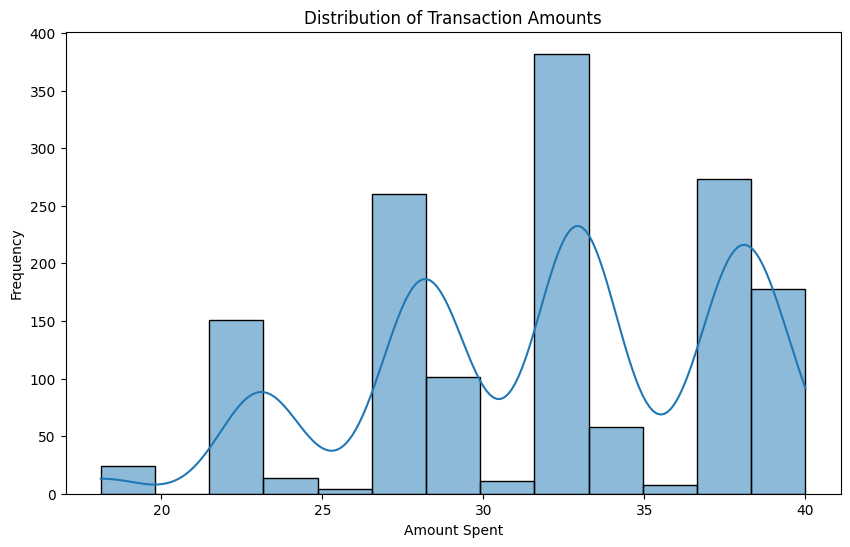

In [ ]:

# Histogram for money
plt.figure(figsize=(10, 6))
sns.histplot(coffee_df['money'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()




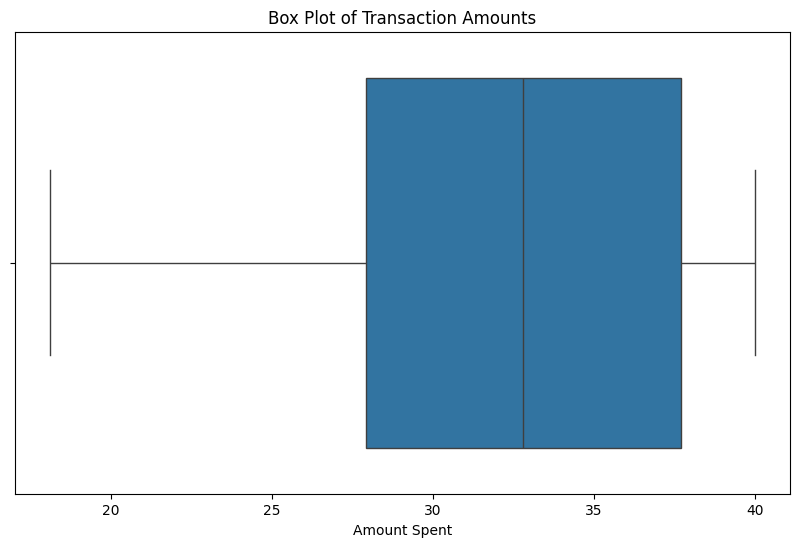

In [ ]:
# Box Plot for money
plt.figure(figsize=(10, 6))
sns.boxplot(x=coffee_df['money'])
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount Spent')
plt.show()


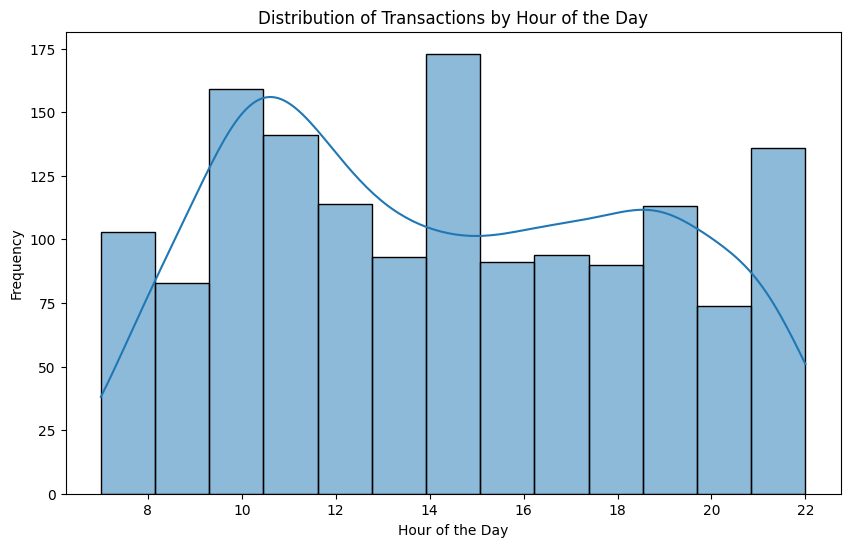

In [ ]:

# Histogram for hour
plt.figure(figsize=(10, 6))
sns.histplot(coffee_df['hour'], kde=True)
plt.title('Distribution of Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

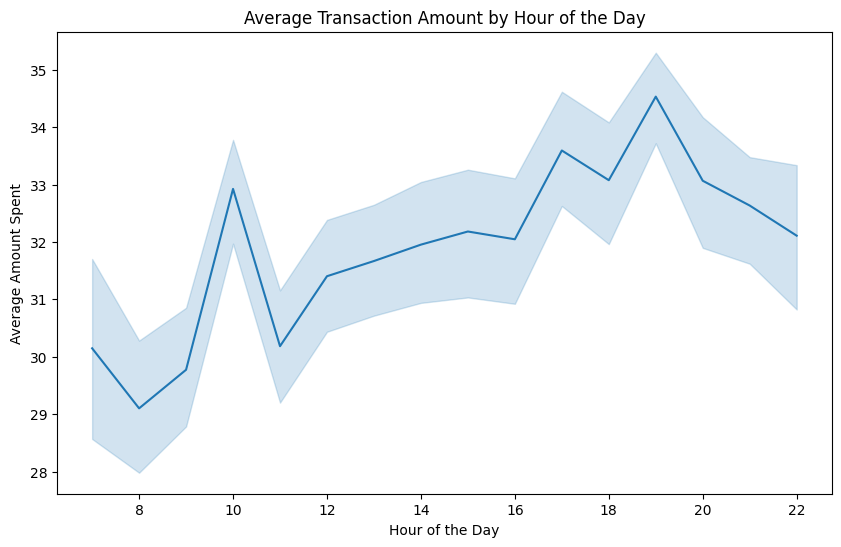

In [ ]:

# Line Plot for hour (if there is a trend)
plt.figure(figsize=(10, 6))
sns.lineplot(data=coffee_df, x='hour', y='money', estimator='mean')
plt.title('Average Transaction Amount by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Amount Spent')
plt.show()


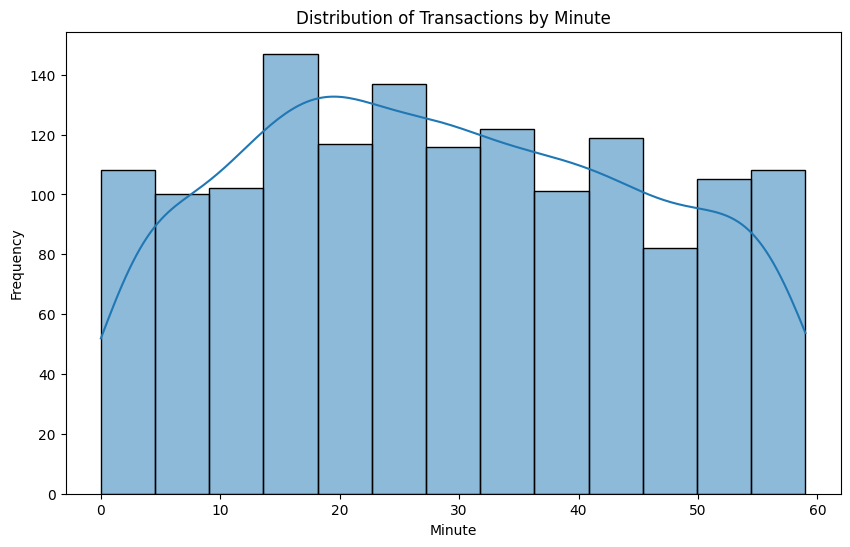

In [ ]:

# Histogram for minute
plt.figure(figsize=(10, 6))
sns.histplot(coffee_df['minute'],  kde=True)
plt.title('Distribution of Transactions by Minute')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.show()



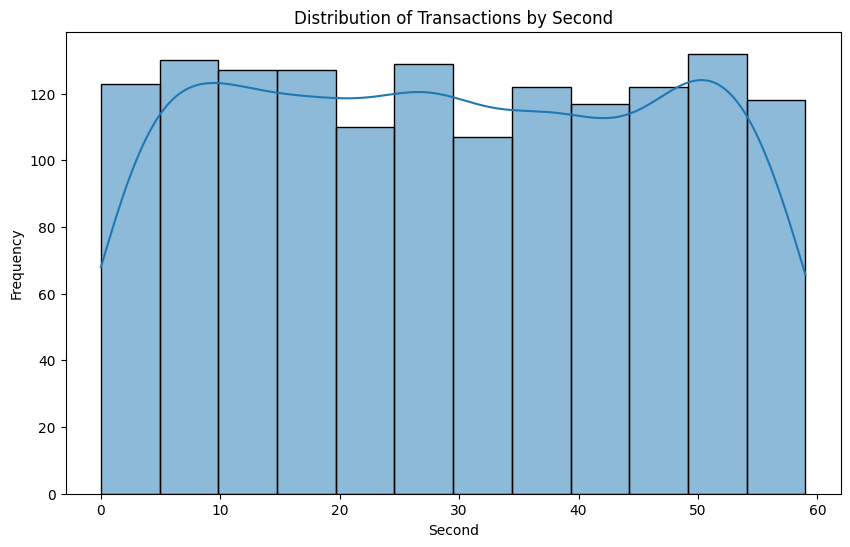

In [ ]:

# Histogram for second
plt.figure(figsize=(10, 6))
sns.histplot(coffee_df['second'], kde=True)
plt.title('Distribution of Transactions by Second')
plt.xlabel('Second')
plt.ylabel('Frequency')
plt.show()


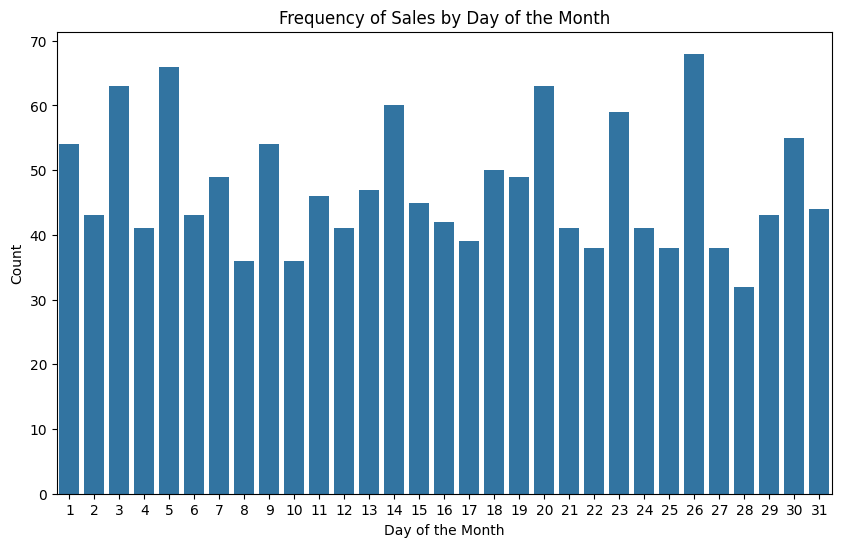

In [ ]:

# Bar Chart for day
plt.figure(figsize=(10, 6))
sns.countplot(data=coffee_df, x='day',)
plt.title('Frequency of Sales by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.show()



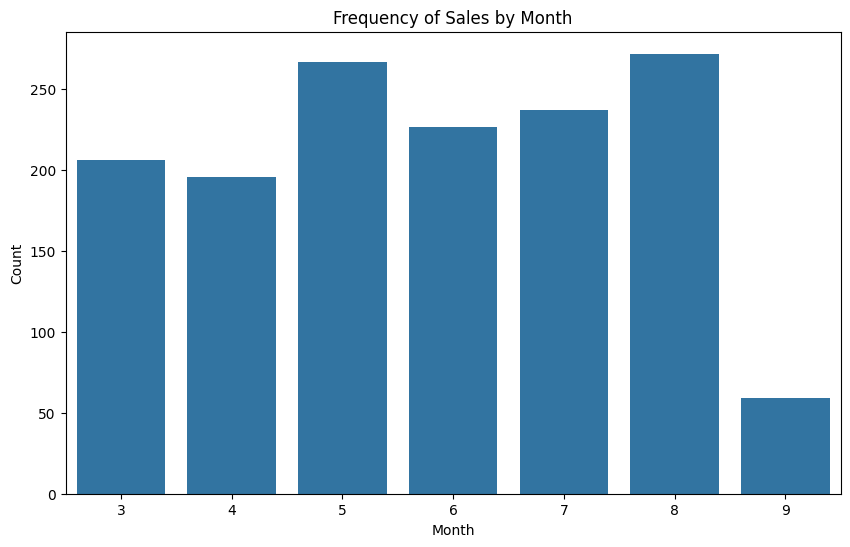

In [ ]:
# Bar Chart for month
plt.figure(figsize=(10, 6))
sns.countplot(data=coffee_df, x='month')
plt.title('Frequency of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()




---



# ***End of Report***
<img src='https://www.shutterstock.com/shutterstock/photos/2267689749/display_1500/stock-vector-thank-you-handwritten-isolated-on-white-background-hand-drawn-lettering-style-one-line-drawing-2267689749.jpg'>